In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows()
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
# What are the places that people most frequently overdose (residences, motels, parks, streets)? 
# How does Connecticut’s prescription tendencies compare to the national average?
# How many actually die the hospital? How many don't reach the hospital?
# How to deal with cocktail of drugs data?

In [4]:
df = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv")

In [5]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [6]:
df = df.drop(['DateType', 'ResidenceCounty', 'ResidenceState', 'DeathCounty', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'MannerofDeath'], axis=1)

In [7]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,...,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,NaN,Substance Abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,23.0,Male,White,RYE,GREENWICH,Hospital,NaN,substance abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,NaN,Transdermal Absorption,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [8]:
df.Date = df.Date.replace(r'\d\d/\d\d/','', regex=True)

In [9]:
df.Date =df.Date.replace(r'\d\d:.*', '', regex=True)

In [10]:
df_age = pd.DataFrame(df.groupby('Date').Age.value_counts())

In [11]:
df_age = pd.DataFrame(df.groupby('Date').Age.value_counts())

In [12]:
df_age=df_age.reset_index(level='Date')

In [13]:
df_age=df_age.rename(columns={'Age': 'agecount'})

In [14]:
df_age = df_age.reset_index()

In [15]:
df_age.head()

,Age,Date,agecount
0,35.0,1/1/12 0:00,1
1,50.0,1/1/13 0:00,1
2,25.0,1/1/15 0:00,1
3,29.0,1/1/15 0:00,1
4,69.0,1/1/15 0:00,1


In [16]:
df.Date = df.Date.astype(str)

In [17]:
df.Date = df.Date.str.strip()

In [18]:
df['Heroin'] = df.Heroin.replace({'Y': 'Heroin'})

In [19]:
df['Cocaine'] = df.Cocaine.replace({'Y': 'Cocaine'})

In [20]:
df['Fentanyl'] = df.Fentanyl.replace({'Y': 'Fentanyl'})

In [21]:
df['Ethanol'] = df.Ethanol.replace({'Y': 'Ethanol'})

In [22]:
df['Hydrocodone'] = df.Hydrocodone.replace({'Y': 'Hydrocodone'})

In [23]:
df['Benzodiazepine'] = df.Benzodiazepine.replace({'Y': 'Benzodiazepine'})

In [24]:
df['Methadone'] = df.Methadone.replace({'Y': 'Methadone'})

In [25]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,...,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,NaN,Substance Abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,23.0,Male,White,RYE,GREENWICH,Hospital,NaN,substance abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,NaN,Transdermal Absorption,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [26]:
df['Race'] = df.Race.replace({
    'Asian Indian': 'Asian',
    'Asian, Other': 'Asian',
    'Chinese': 'Asian',
    'Hawaiian': 'Other',
    'Unknown': 'Other',
    'Hispanic, Black': 'Hispanic',
    'Hispanic, White': 'Hispanic',
    'Native American, Other': 'Native American',
})

In [27]:
df.InjuryPlace.value_counts().head(30)

Residence                           3601
Other                                269
Residential Building                 241
Hotel or Motel                       227
Unknown                              176
In Vehicle                            57
Automobile                            46
Other, Other Outdoor Area             42
Parking Lot                           41
Halfway House                         33
House                                 25
Restaurant                            19
Apartment                             19
Other indoor Area                     17
Apartment House                       12
Other, Public Buildings               11
Other (unknown)                       10
Nursing Home                          10
Driveway                               9
Public Park                            9
Sidewalk                               8
Street                                 8
Forest, Wooded Area                    8
Porch                                  7
Other, Park or R

In [28]:
df['InjuryPlace'] = df.InjuryPlace.replace({
    'Automobile': 'In Vehicle',
    'Other, Other Outdoor Area': 'Outdoor Area',
    'Other, Public Buildings': 'Public Buildings',
    'Other (unknown)': 'Unknown',
    'Other, Park or Recreational Area': 'Park or Recreational Area',
})

In [30]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,...,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,NaN,Substance Abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,23.0,Male,White,RYE,GREENWICH,Hospital,NaN,substance abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,22.0,Male,Asian,FLUSHING,GREENWICH,Hospital,NaN,Transdermal Absorption,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [60]:
df.InjuryPlace.value_counts()

Residence                 3908
Other                      269
Hotel or Motel             228
Unknown                    186
In Vehicle                 104
Parking Lot                 50
Outdoor Area                47
Halfway House               33
Street                      20
Restaurant                  19
Indoor Area                 19
Public Park                 19
Public Buildings            17
Nursing Home                10
Backyard                     9
Garage                       9
Forest                       8
Porch                        7
Store                        7
Alleyway                     7
Hospital                     6
Office Building              6
Gas Station                  5
Boat/Marina                  4
Bar                          4
Casino                       3
Train Station                3
Stairs                       3
Penal Institution            2
Beach                        2
Cemetery                     2
Detoxification Center        2
Movie Ho

In [59]:
df['InjuryPlace'] = df.InjuryPlace.replace({
    'Residential Building': 'Residence',
    'residential building': 'Residence',
    'House': 'Residence',
    'Other, Industrial Area': 'Indoor Area',
    'Other, Health Care Facility': 'Health Care Facility',
    'University or College': 'College Campus',
    'Apartment': 'Residence',
    'Driveway': 'Parking Lot',
    'Building': 'Public Buildings',
    'Other indoor Area': 'Indoor Area',
    'Forest, Wooded Area': 'Forest',
    'Park or Recreational Area': 'Public Park',
    'Hospital or Emergency Room': 'Hospital',
    'Sidewalk': 'Street',
    'Park': 'Public Park',
    'Store or Shopping Area': 'Store',
    'Other, Residential Institution': 'Residence',
    'Bar or Night Club': 'Bar',
    'Apartment House': 'Residence',
    'Shed': 'Garage',
    'Field': 'Outdoor Area',
    'Train or Subway Station': 'Train Station',
    'Roadway': 'Street',
    'car in hartford': 'In Vehicle',
    'Rest Home': 'Residence',
    'School, Primary or Secondary': 'School',
    'Other, Farm or Ranch': 'Farm',
    'Shopping Center': 'Store',
    'Motel': 'Hotel or Motel',
    'Public Park, Urban or Suburban': 'Public Park',
    'residence': 'Residence',
    'homeless shelter': 'Homeless Shelter',
    'Yard': 'Backyard',
    'Campgrounds': 'Outdoor Area',
    'Movie House or Theater': 'Movie Theatre'
    
    
})

In [74]:
df.to_csv('connecticutdrugs.csv')

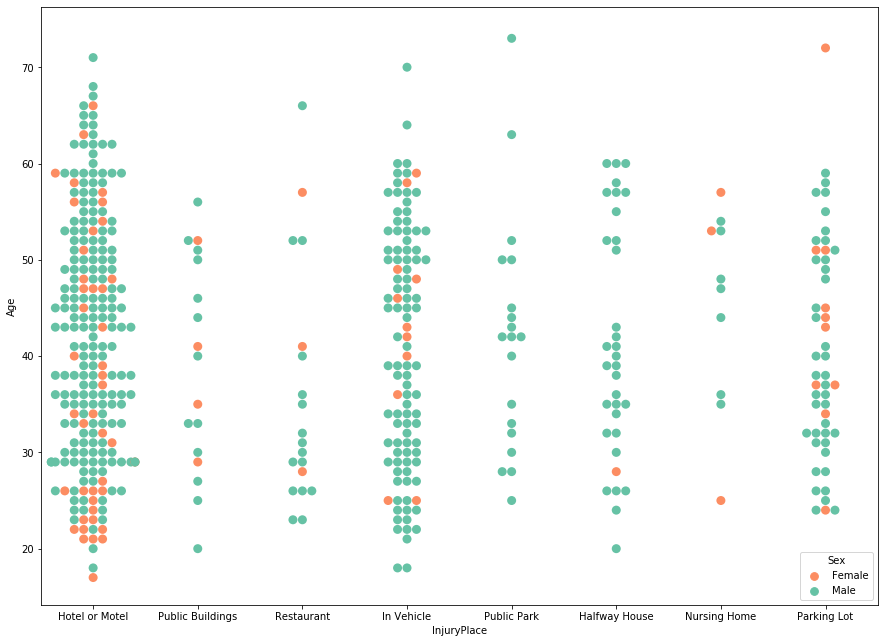

In [96]:
hi = df[df.InjuryPlace.isin(['Hotel or Motel', 'In Vehicle', 'Parking Lot', 'Halfway House', 'Restaurant', 'Public Buildings', "Nursing Home", 'Driveway', 'Public Park', 'Sidewalk'])]

        
fig, ax = plt.subplots(figsize=(15,11))
chart = sns.swarmplot(ax=ax, x="InjuryPlace", y="Age", hue='Sex',
                      palette=["#fc8d62", "#66c2a5"], size = 9, data=hi)

plt.savefig("chart2.pdf")


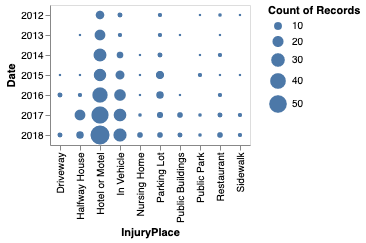

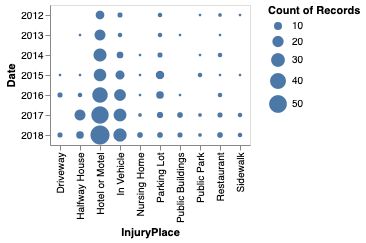

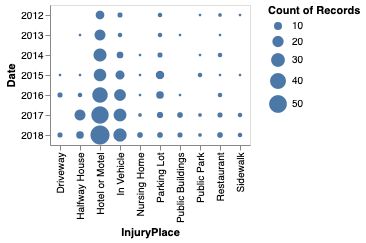

In [114]:
hi = df[df.InjuryPlace.isin(['Hotel or Motel', 'In Vehicle', 'Parking Lot', 'Halfway House', 'Restaurant', 'Public Buildings', "Nursing Home", 'Driveway', 'Public Park', 'Sidewalk'])]

source = hi

alt.Chart(source).mark_circle().encode(
    x='InjuryPlace',
    y='Date',
    size='count()'
)

# chart.save('chart.svg')


In [171]:
df2 = pd.read_csv("totaldeathsbyrace.csv")

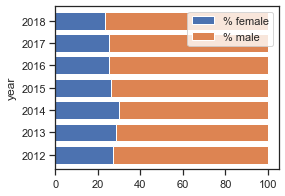

In [172]:
df2.plot(x='year', 
         y=['% female', '% male'], 
         kind='barh', 
         figsize = (4,3),
         width=0.8,
         stacked=True)
plt.savefig('gender.pdf')

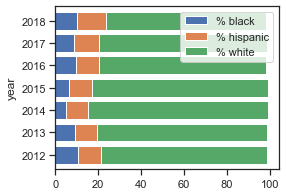

In [173]:
df2.plot(x='year', 
         y=['% black', 
            '% hispanic', 
            '% white'], 
         kind='barh',
         figsize = (4,3),
         width=0.8,
         stacked=True)
plt.savefig('race.pdf')

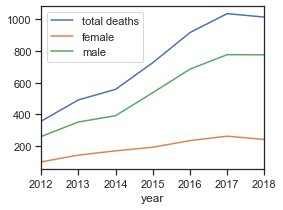

In [175]:
df2.plot(x='year', 
         y=['total deaths', 'female', 'male'], 
         kind='line',
         figsize = (4,3))
plt.savefig('deathsperyear.pdf')